# Forest Cover Type Classification

The exercises on this sheet are graded by a maximum of **17** points. You will be asked to implement several functions.

Team work is not allowed. Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not.

If you use any code fragments found on the Internet, make sure you reference them properly.

In this exercise, we will **predict the forest cover type** (the predominant kind of tree cover) from strictly cartographic variables. 

As in the regression assignment, $Y$ stands for a column vector of "target" values, that is the $i$-th row of $Y$ contains the desired output for the $i$-th data point. Contrary to regression, the elements of $Y$ in this classification task are integer values.

We will work with several popular classifiers provided by Scikit-learn package.

## Dataset: Forest cover data
This dataset contains 581012 tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. 

This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

### Data Dictionary
- Elevation = Elevation in meters.
- Aspect = Aspect in degrees azimuth.
- Slope = Slope in degrees.
- Horizontal_Distance_To_Hydrology = Horizontal distance to nearest surface water features.
- Vertical_Distance_To_Hydrology = Vertical distance to nearest surface water features.
- Horizontal_Distance_To_Roadways = Horizontal distance to nearest roadway.
- Hillshade_9am = Hill shade index at 9am, summer solstice. Value out of 255.
- Hillshade_Noon = Hill shade index at noon, summer solstice. Value out of 255.
- Hillshade_3pm = Hill shade index at 3pm, summer solstice. Value out of 255.
- Horizontal_Distance_To_Fire_Points = sHorizontal distance to nearest wildfire ignition points.
- Wilderness_Area1 = Rawah Wilderness Area
- Wilderness_Area2 = Neota Wilderness Area
- Wilderness_Area3 = Comanche Peak Wilderness Area
- Wilderness_Area4 = Cache la Poudre Wilderness Area
- Soil_Type1 to Soil_Type40 (Total 40 Types)
- **Cover_Type** = Forest Cover Type designation. Integer value between 1 and 7, with the following key:

    1. Spruce/Fir
    2. Lodgepole Pine
    3. Ponderosa Pine
    4. Cottonwood/Willow
    5. Aspen
    6. Douglas-fir
    7. Krummholz



## Objective: 

We will **predict different cover types** in different wilderness areas of the Roosevelt National Forest of Northern Colorado with the best accuracy.

## Content:

1) Load Data (1 point)

2) Basic Statistics (1 point)

3) Exploratory Data Analysis (2 points)

4) Training Models (1 point)

    a) Logistic Regression (1 point)

    b) Decision Tree Classifier (1 point)

    c) Random Forest (1 point)

    d) K Nearest Neighbor (1 point)
    
    x) Grid Search (Optional)

    e) Support Vector Machine (Optional - Highly recommended if your computer is powerful enough)
    
    x) Comment (1 point)

5) Data Imbalance Problem

    a) Training with Under-Sampled Data (3 points)

    b) Training with Over-Sampled Data (3 points)
    
    x) Comment (1 point)

In [1]:
# import packages
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## 1) Load data
- Download the dataset from: https://drive.google.com/file/d/1zmAtaGQzIz2odciyqBc8mJHelBIcbsGV/view?usp=sharing
- Use ```pd.read_csv()``` to load the data, without any arguments.

In [3]:
df = pd.read_csv('/Users/tunayildiz/MachineLearningforSciences/Datasets/ForestCover.csv')

- Visualize the first and the last 5 rows of the data.

In [4]:
# See the first records of data
df.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
# See the last records of data
df.tail(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


## 2) Basic statistics
- Print overall information of the data frame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

- Print dataframe statistics (mean, std, etc.).

In [7]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


- Check if there are missing values. If yes, drop them.

In [8]:
df.isna().sum().sum()

0

## 3) Exploratory Data Analysis
- Show the category distribution for the target data.

<AxesSubplot: xlabel='Cover_Type', ylabel='Count'>

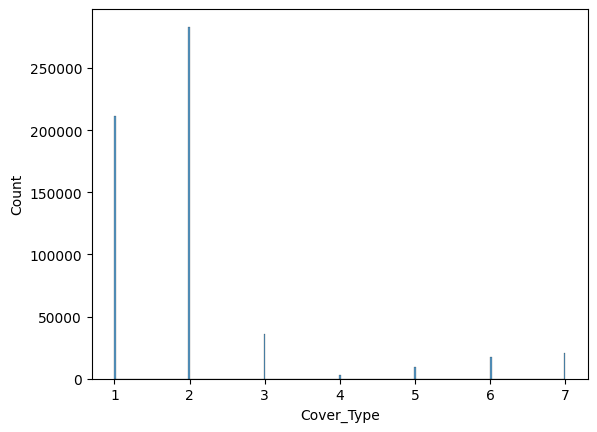

In [11]:
import seaborn as sns 
sns.histplot(df['Cover_Type'])

- Visulize the target distribution.

### Feature Histograms 
- Visulize data distribution of the first four features via histograms. (Show four figures.)

<AxesSubplot: xlabel='Horizontal_Distance_To_Hydrology', ylabel='Count'>

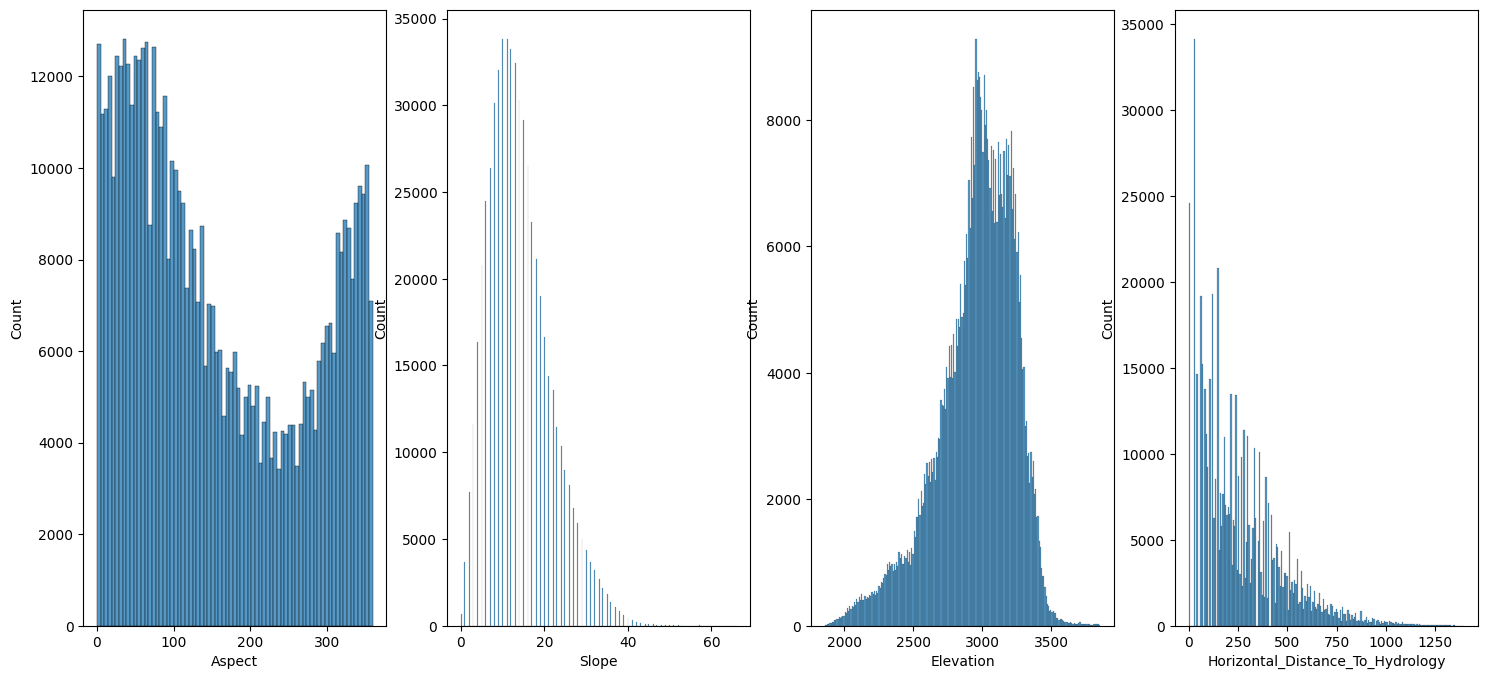

In [20]:
fig,axs = plt.subplots(ncols=4,figsize=(18,8))
sns.histplot(df['Aspect'], ax=axs[0])
sns.histplot(df['Slope'], ax=axs[1])
sns.histplot(df['Elevation'], ax=axs[2])
sns.histplot(df['Horizontal_Distance_To_Hydrology'], ax=axs[3])


### Correlation between Variables
- Show correlation between variables. (Since 55 columns are too many, please show here a 10x10 heatmap for the first 10 features.）

<AxesSubplot: >

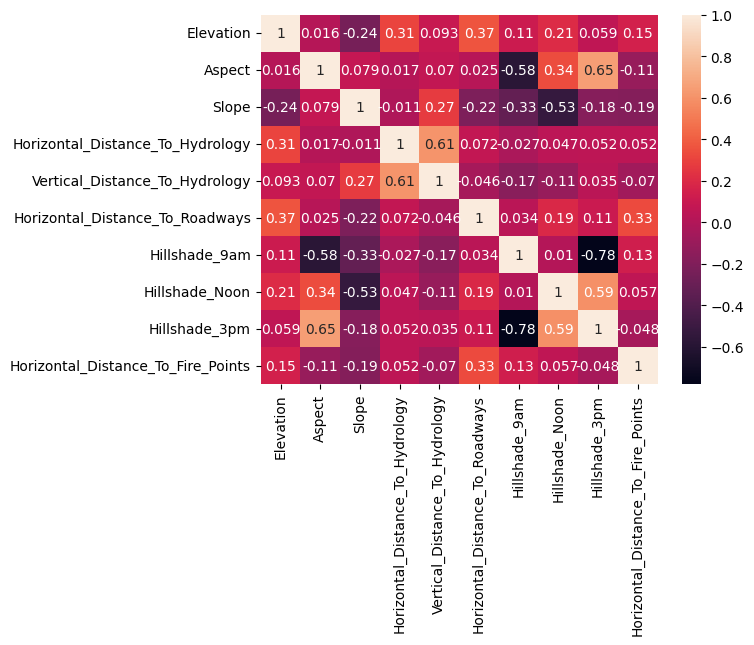

In [10]:
df_features = df.iloc[:,:10]
sns.heatmap(df_features.corr(),annot=True)

### Data Distribution w.r.t. Categories
- Show data distribution w.r.t. categories via boxplots. (x-axis: cover type, y-axis: feature variable, please show 10 figures for the first 10 variables.)

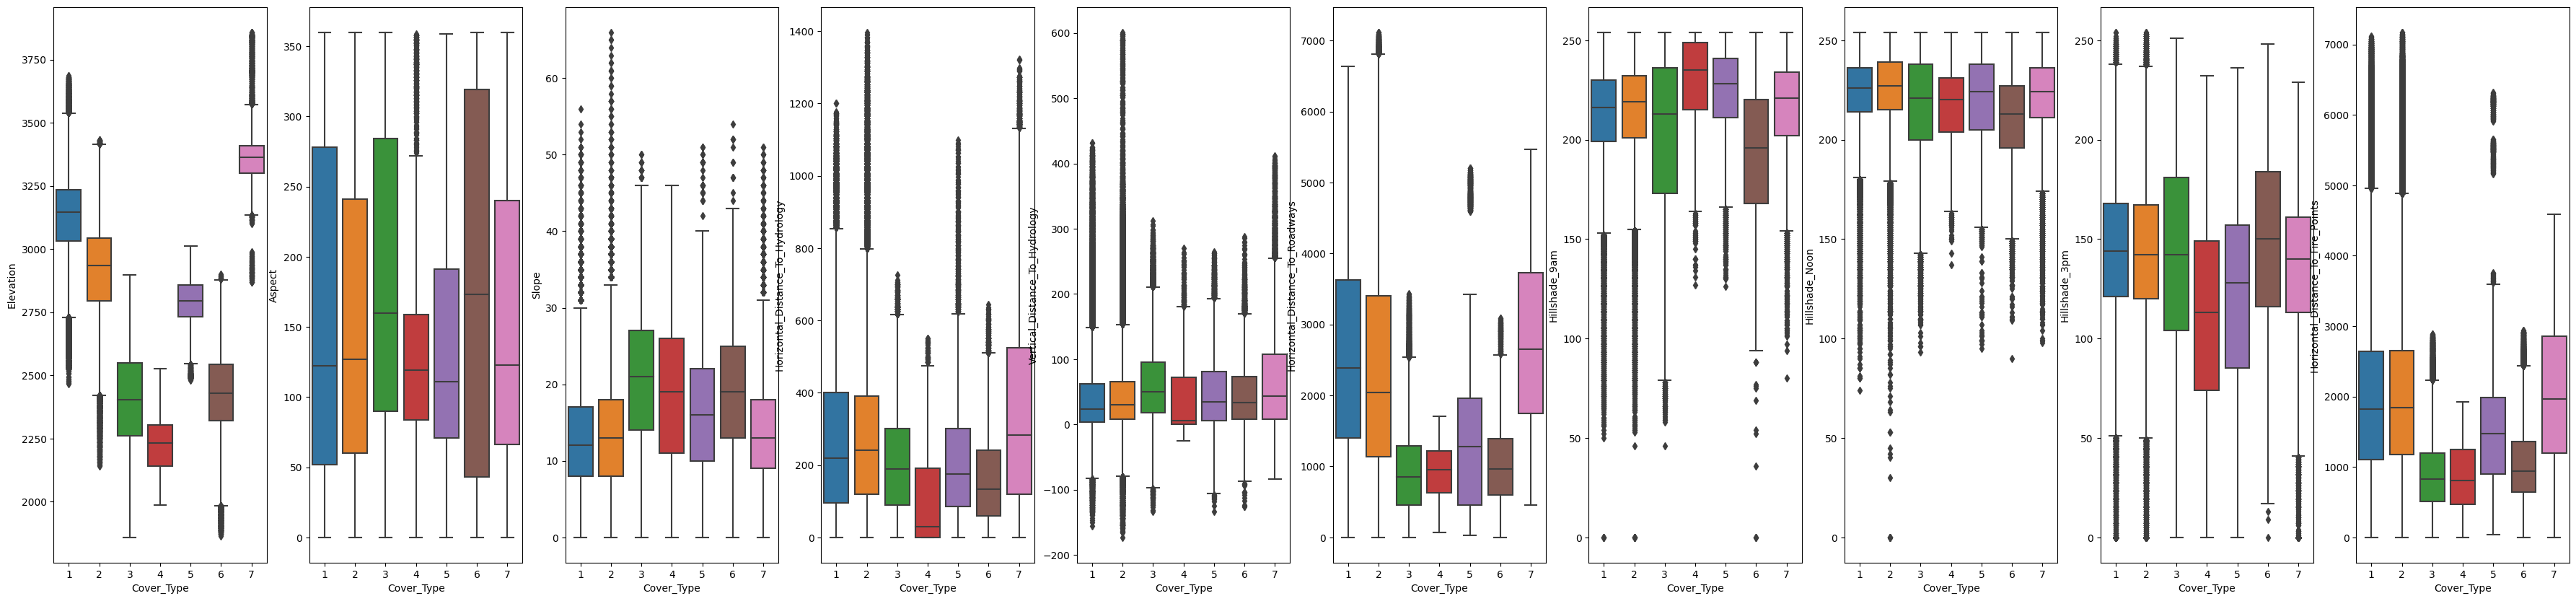

In [11]:
fig,axs = plt.subplots(figsize=(45,10),ncols = 10)
i = 0
for feature in df.columns:
    sns.boxplot(x=df['Cover_Type'],y=df[feature], ax=axs[i])
    i+=1
    if i == 10:
        break

- Are there any features which shows not much of variance with respect to classes? Which ones?

ANSWER: Horizontal Distance to Hydrology, Vertical Distance to Hydrology, Hillside_9am

- Which features might do good job in the prediction?

ANSWER: For the first 10 features, [elevation, slopes, Horizontal_Distance_To_Roadways]

## 4) Training Models

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

- Define Feature (X) and Target (y)

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

- Splitting the data into train and test.

    Split the data into train and test with test size and 30% and train size as 70%, use a random seed.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (406708, 54)
Test data size: (174304, 54)


- Normalize the data.

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 4a) Logistic Regression
- Train the Logistic Regression model (See: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Suggestion: 
- Please use the setting n_jobs=-1 for exploiting all of the cores if it is taken by the model.
- For the logitic regression, You can use the settings solver='liblinear'  -- takes a few minutes
- For the logitic regression, solver='sag' or 'saga' -- takes less time but the results are worse (if your computer cannot solve in a few minutes, please utilize this solver.)
- If it still takes too much time:
    - Use only first 10 columns of the dataset 
    - Don't forget to use the same settings for all the models

In [16]:
%%time
# Train the model (only training)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)

CPU times: user 33.4 s, sys: 8.01 s, total: 41.4 s
Wall time: 11.2 s


/Users/tunayildiz/MachineLearningforSciences/m14s/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

- Predict on the test data

In [17]:
%%time
# Test the model
y_pred = lr.predict(X_test)

CPU times: user 81.7 ms, sys: 38.5 ms, total: 120 ms
Wall time: 41.2 ms


- Compute and print performance metrics, using ```accuracy_score()```: the fraction of correctly classified samples.

In [18]:
%%time
from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred))
print(f'Logistic Regression Accuracy: {accuracy_score(y_test,y_pred)}')


[[44392 17767    12     0     0    29  1298]
 [15594 68046  1020     3    54   432    49]
 [    0  1018  8649   172     4   738     0]
 [    0     3   396   324     0    99     0]
 [   14  2725    84     0     8    19     0]
 [    0  1257  2691    17     9  1255     0]
 [ 2502    58     0     0     0     0  3566]]
Logistic Regression Accuracy: 0.7242518817697815
CPU times: user 210 ms, sys: 72.3 ms, total: 282 ms
Wall time: 127 ms


### 4b) Decision Tree Classifier
- Train and test with decision tree classifier
- Print the accuracy

In [22]:
%%time
# Train the model (only training)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy')

dtc.fit(X_train,y_train)

CPU times: user 5.49 s, sys: 217 ms, total: 5.71 s
Wall time: 5.84 s


DecisionTreeClassifier(criterion='entropy')

In [23]:
%%time
# Test the model

y_pred = dtc.predict(X_test)

CPU times: user 72.6 ms, sys: 38.5 ms, total: 111 ms
Wall time: 114 ms


In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(accuracy_score(y_test,y_pred))

0.9403742885992289


### 4c) Random Forest
- Train and test with decision tree classifier
- Print the accuracy

In [27]:
%%time
# Train the model (only training)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')

rfc.fit(X_train,y_train)

CPU times: user 9.93 s, sys: 295 ms, total: 10.2 s
Wall time: 10.4 s


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [28]:
%%time
# Test the model

y_pred = rfc.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9416766109785203
CPU times: user 697 ms, sys: 117 ms, total: 814 ms
Wall time: 831 ms


### 4d) K Nearest Neighbor
- Train and test with KNN classifier
- Print the accuracy

(It might take a bit long, around an hour if using one cpu core.)

In [58]:
%%time
# Train the model (only training)
from sklearn.neighbors import KNeighborsRegressor

knc = KNeighborsClassifier()

knc.fit(X_train,y_train)

CPU times: user 165 ms, sys: 218 ms, total: 383 ms
Wall time: 392 ms


KNeighborsClassifier()

In [59]:
%%time
# Test the model
y_pred = knc.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(f'K Nearest Neighbors Classifier Accuracy: {accuracy_score(y_test,y_pred)}')

[[58472  4629     6     0    55    22   314]
 [ 3823 80486   257     1   332   261    38]
 [    8   325  9574    72    16   586     0]
 [    0     0   145   634     0    43     0]
 [   86   531    29     0  2190    14     0]
 [   21   324   626    42     6  4210     0]
 [  362    68     0     0     0     0  5696]]
K Nearest Neighbors Classifier Accuracy: 0.9251767027721681
CPU times: user 13min 10s, sys: 1min 5s, total: 14min 15s
Wall time: 2min 40s


### Hyperparameter Tuning (OPTIONAL)

Let's search a better K (e.g. among candidates \[3,5,11\]) for the KNN classifier, using ```GridSearchCV()```.


- define parameter candidates and grid search

- fit the model wtih all grid parameters

- print the best K.

- print the test accuracy with this K.

### 4e) Support Vector Machine (OPTIONAL)
- Train and test with SVM classifier
- Print the accuracy

(It might take a bit long, around 3 hours if using one cpu core...)

In [ ]:
%%time
# Train the model (only training)

In [ ]:
%%time
# Test the model

### Conclusion (Graded)
- Please write your conclusion:

ANSWER: Logistic regression scored the lowest because the data is hard to fit in a sigmoid function to determine the predictions. Random forest scored the highest with an accuracy of 94.2% which is similar to regular decision tree with 0.94%. This is an expected result since decision tree algorithms are able to construct a deeper decision model compared to regular sigmoid function (logistic regression). K nearest neighbor is close to decision trees with the accuracy of 92.5%. Kmeans++ wasn't used in this exercise but it would boost the accuracy to somewhere close to the decision tree algorithms.

Accuracy score (Graded):
- Logistic Regression: 0.724
- Decision Tree: 0.940
- Random Forest: 0.942
- K Nearest Neighbor: 0.925
- K Nearest Neighbor after hypertuning K (optional):
- Support Vector Machine (optional): 

Let's go deeper.
## 5) Data imbalance problem

An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed. The distribution can vary from a slight bias to a severe imbalance where there is one example in the minority class for hundreds, thousands, or millions of examples in the majority class or classes.

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

Here you can change the dataset that you use to build your predictive model to have more balanced data.

This change is called sampling your dataset and there are two main methods that you can use to even-up the classes:

- 1) You can add copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement); 
- 2) or you can delete instances from the over-represented class, called under-sampling.

Please train Randome Forest classifiers with both under-sampled data and over-sampled data, and compare their accuracy scores.

As we have seen in 3), the data is imbalanced.

### 5a) Training with under-sampled data

- print the size of the smallest class

In [32]:
print(df['Cover_Type'].value_counts())
min_class_size = min(df['Cover_Type'].value_counts())
print("Size of smallest class: ", min_class_size)

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64
Size of smallest class:  2747


- Undersample all the majority classes so that all classes has the same smallest cardinality.

Suggested Steps:
1) Subsets for each class, using .query()
2) Downsample each subset, using .sample()
3) Concatenate the seven subsets, using .concat(), 
4) Shuffle the data, using .sample() on the full set

Second Option:
- Use a for-loop to iterate the target values, use .unique()
- For each target value, take the samples whose target = the certain target
- Sample from this subset and append in a list
- Concatenate the list

In [50]:
df['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [54]:
from sklearn.utils import resample 

undersampled_dfs = [resample(df[df['Cover_Type'] == label], replace=False, n_samples=min_class_size) for label in df['Cover_Type'].unique()]
undersampled_df = pd.concat(undersampled_dfs)

In [55]:
print(undersampled_df['Cover_Type'].value_counts())

5    2747
2    2747
1    2747
7    2747
3    2747
6    2747
4    2747
Name: Cover_Type, dtype: int64


- check the class distribution of the undersampled data

<AxesSubplot: xlabel='Cover_Type', ylabel='Count'>

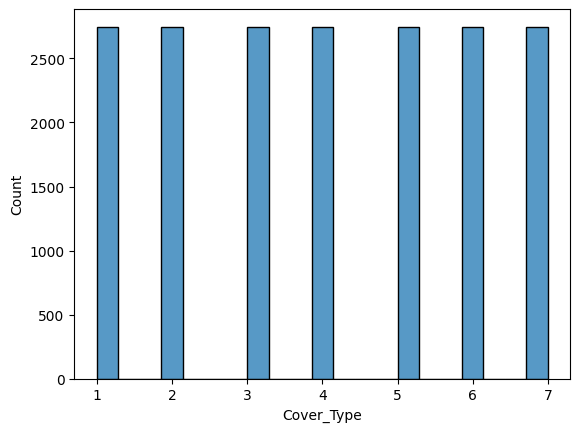

In [56]:
sns.histplot(undersampled_df['Cover_Type'])

In [57]:
undersampled_df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

- Preprocessing data (define X, y; train test split; normalize data)

In [58]:
X = undersampled_df.iloc[:,:-1]
y = undersampled_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Training undersampled data size:',X_train.shape)
print('Test undersampled data size:',X_test.shape)

Training undersampled data size: (15383, 54)
Test undersampled data size: (3846, 54)


- Train and test random forest classifier on under-sampled data
- Print the accuracy

In [59]:
%%time
# Train
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')

rfc.fit(X_train,y_train)

CPU times: user 349 ms, sys: 16.7 ms, total: 366 ms
Wall time: 449 ms


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [60]:
%%time
# Test
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print('\n')

0.8416536661466458


CPU times: user 27.5 ms, sys: 5.42 ms, total: 32.9 ms
Wall time: 28.4 ms


### 5b) Training with over-sampled data

- print the size of the largest class

In [81]:
max_class_size = max(df['Cover_Type'].value_counts())
print("Size of largest class: ", max_class_size)

Size of largest class:  283301


- Oversample the classes. (Don't forget to use replace=True in sampling)

In [82]:
# subsets for each class, using .query()
# oversample each subset, using .sample()
# concatenate the seven subsets, using .concat(), and shuffle the data (using .sample() on the full set)

oversampled_dfs = [resample(df[df['Cover_Type'] == label], replace=True, n_samples=max(df['Cover_Type'].value_counts())) for label in df['Cover_Type'].unique()]
oversampled_df = pd.concat(oversampled_dfs)

oversampled_df = oversampled_df.sample(frac=1.0, random_state=42)

- check the class distribution of the oversampled data

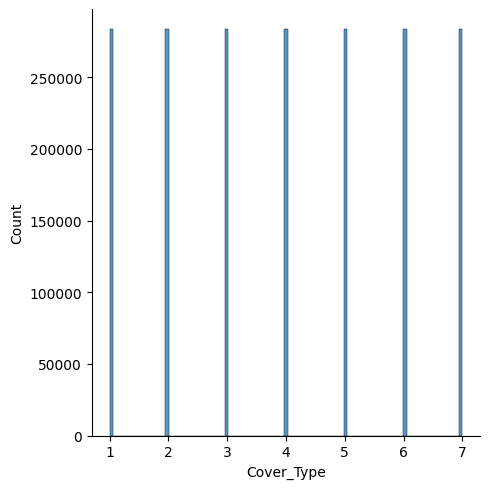

In [83]:
sns.displot(oversampled_df['Cover_Type'])

- Preprocessing data (define X, y; train test split; normalize data)

In [78]:
X = oversampled_df.iloc[:,:-1]
y = oversampled_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Training undersampled data size:',X_train.shape)
print('Test undersampled data size:',X_test.shape)

Training undersampled data size: (1388174, 54)
Test undersampled data size: (594933, 54)


- Train and test random forest classifier on over-sampled data
- Print the accuracy

In [79]:
%%time
# Train
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')

rfc.fit(X_train,y_train)

CPU times: user 46.7 s, sys: 1.32 s, total: 48 s
Wall time: 49.4 s


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [80]:
%%time
# Test
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print('\n')

0.9925958049057625


CPU times: user 2.19 s, sys: 345 ms, total: 2.54 s
Wall time: 2.62 s


#### Conclusion on imbalanced data solution (with random forest classifier):
Accuracy:

- imbalanced data: 0.942
- undersampled data: 0.842
- oversampled data: 0.993

Which sampling method works the best? Why?

ANSWER: Imbalanced data shows the best prediction. This is because of the errors come with undersampling and oversampling the data. For undersampled data, we simply remove rows so that the dataset has the same counts of target variables. The smaller the dataset, the lower the accuracy. Oversampled data shows 0.993 accuracy which is simply wrong. This is because we copy rows in order the lower count target variables to match their amount to the highest numbered target variable in the dataset. This gives a very high score of accuracy because exact copies are found both in train and test dataset. The model sees the exact row in both train and test dataset instead of learning the general trend and making predictions.